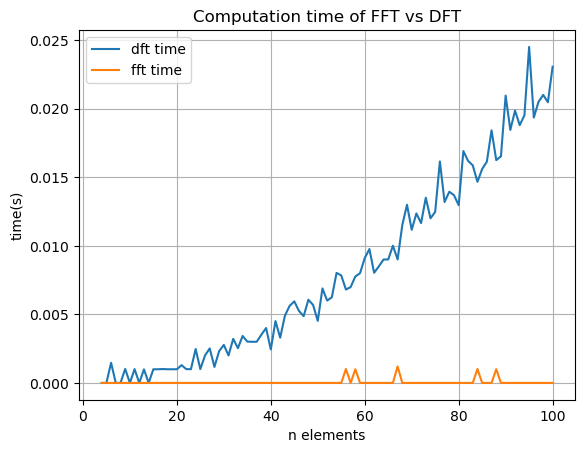

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

def dft(x_arr,f_x):
    
    start_time=time.time()
    
    n=len(x_arr)
    dx=x_arr[1]-x_arr[0]
    k_arr=np.ones(n)*(1j)
    f_k=np.ones(n)*(1j)
    
    x_arr=x_arr-((x_arr[0])*np.ones(n))  #shifts the origin to 0 
    
    for q in np.arange(-n/2,n/2,1,int):
        k_arr[q]=((2*np.pi*q)/(n*dx))
        s=0
        for p in np.arange(-n/2,n/2,1,int):
            s=s+(f_x[p]*np.exp(-(1j)*k_arr[q]*x_arr[p]))
        f_k[q]=((1/np.sqrt(n))*s)
    
    end_time=time.time()
    
    return k_arr,f_k,(end_time-start_time)

x_min = -1
x_max = 1
n = 2**2
dx = (x_max-x_min)/(n-1)
x_arr=np.arange(x_min,x_max+dx,dx,float)
f_x=np.sin(x_arr)


k_arr,f_k,time_dft=dft(x_arr,f_x)

fft_arr=np.fft.fft(f_x,norm="ortho")
k_arr1=2*np.pi*np.fft.fftfreq(n,dx)

dft_time_arr=[]
fft_time_arr=[]
n_arr=np.arange(4,101,1)
for n in n_arr:    
    #Parameters of Program
    x_min = -5
    x_max = 5
    dx = (x_max-x_min)/(n-1)
    x_arr=np.arange(x_min,x_max+dx,dx,float)
    f_x=np.sin(x_arr)


    k_arr,f_k,time_dft=dft(x_arr,f_x)
    dft_time_arr.append(time_dft)

    start_time=time.time()
    fft_arr=np.fft.fft(f_x,norm="ortho")
    k_arr1=2*np.pi*np.fft.fftfreq(n,dx)
    end_time=time.time()

    time_fft=end_time-start_time
    fft_time_arr.append(time_fft)
    
plt.plot(n_arr,dft_time_arr,label="dft time")
plt.plot(n_arr,fft_time_arr,label="fft time")
plt.xlabel("n elements")
plt.ylabel("time(s)")
plt.grid()
plt.legend()
plt.title("Computation time of FFT vs DFT")
plt.show()
